# SARIMAX

In [59]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Label - the column we are trying to predict into the future <br>
pd.get_dummies() - used for 1 hot encoding

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv('/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/PythonForTimeSeriesJosePortilla/UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'

In [63]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [64]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [65]:
# Remove missing values
df1 = df.dropna()

In [66]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [67]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [68]:
# change float to int
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

for col in cols:
    df1[col] = df1[col].astype(int)

In [69]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


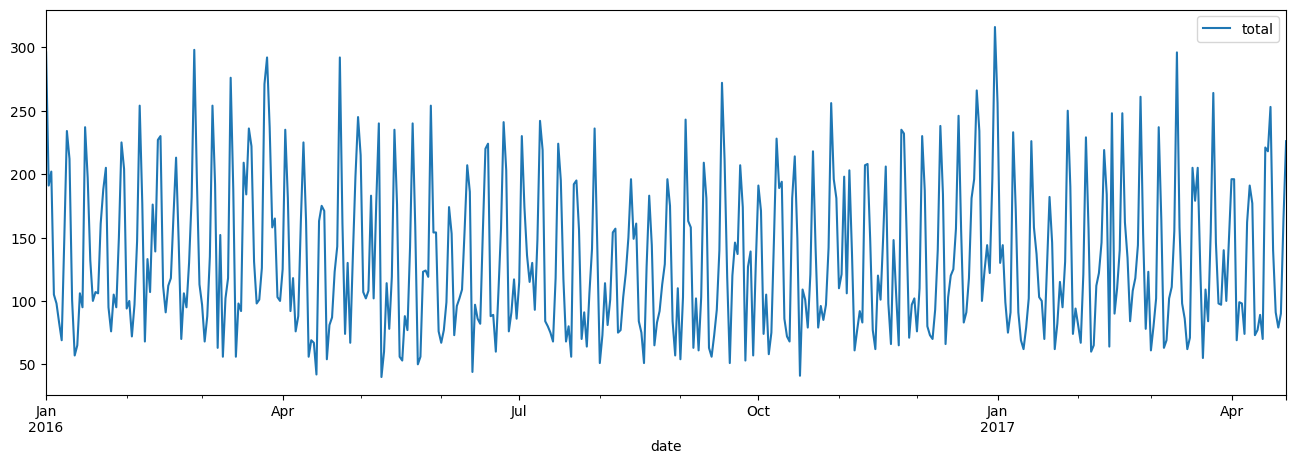

In [70]:
# plot totals
df1['total'].plot(figsize=(16,5), legend=True)
plt.show()

In [71]:
# dates where holiday == 1
df1.query('holiday == 1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [72]:
# dates where holiday == 1 - alternative method
df1[df1['holiday'] == 1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

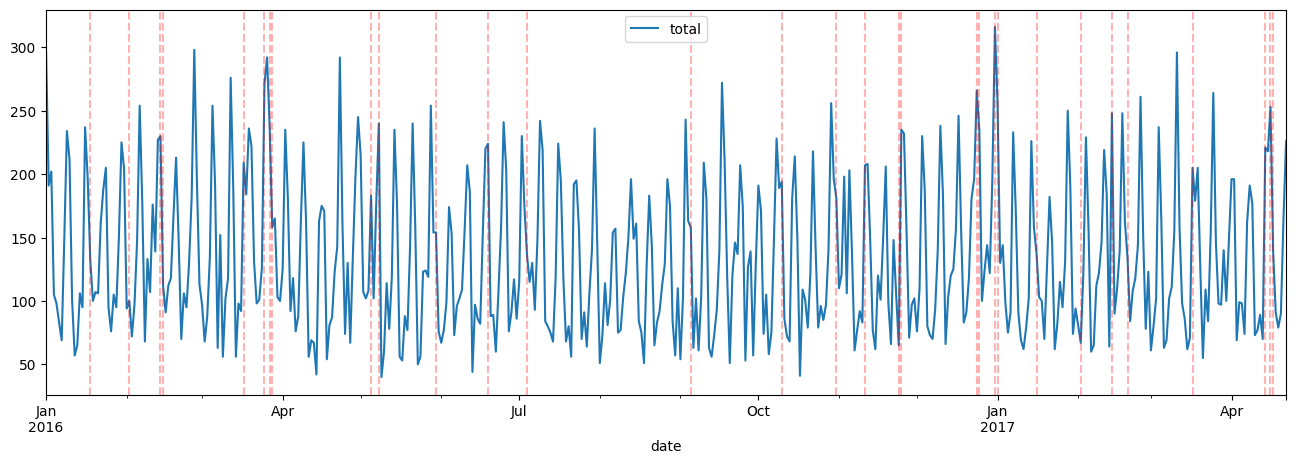

In [73]:
# add in a vertical line for holidays
ax = df1['total'].plot(figsize=(16,5), legend=True)

for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.3)
plt.show()

#### ETS decomposition to check for seasonality

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose


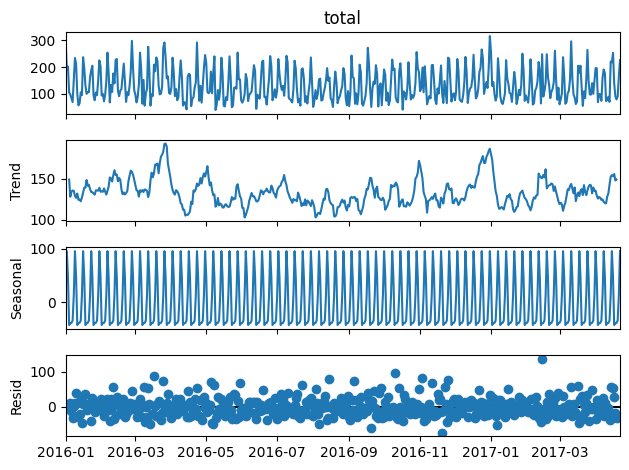

In [75]:
result = seasonal_decompose(df1['total'])
result.plot()
plt.show()

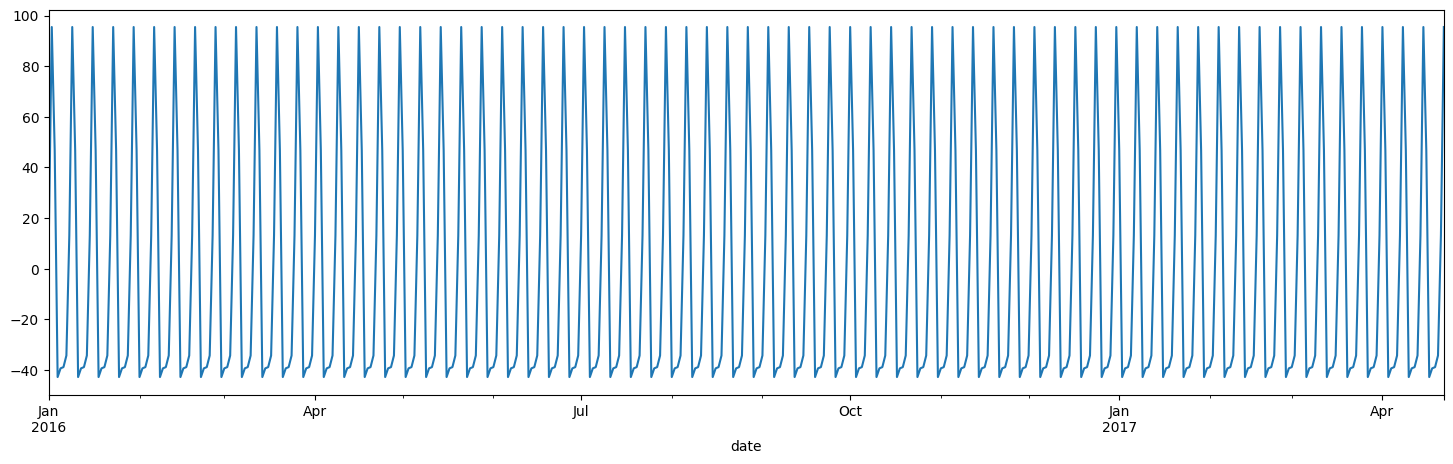

In [76]:
# plot seasonal component only
result.seasonal.plot(figsize=(18,5))
plt.show()

# Fit to a basic SARIMA modle

In [77]:
len(df1)

478

#### Train-Test split

In [78]:
# set 4 weeks for testing
train = df1.iloc[:436]
test = df1.iloc[436:]

#### auto_arima to get the weights

In [79]:
!pip install pmdarima
from pmdarima import auto_arima

In [80]:
auto_arima(df1['total'], seasonal=True, m=7, trace=False,).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.019
Date:                   Mon, 08 Dec 2025   AIC                           4774.038
Time:                           01:22:28   BIC                           4790.716
Sample:                       01-01-2016   HQIC                          4780.595
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8298      1.427      2.685      0.007       1.034       6.626
ar.S.L7        0.9681      0.011     84.337      0.000       0.946       0.991
ma.S.L7       -0.7840      0.045    -17.247      0.000      -0.873      -0.695
sigma2      1182.0419     68.220     17.327      0.000    1048.333    1315.751
===================================================================================
Ljung-Box (L1) (Q):                  16.27   Jarque-Bera (JB):                73.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.79
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
modle = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

# use enforce_invertibility=False to avoid: ValueError: The computed MA polynomial is not invertible. or ValueError: The computed AR polynomial is not stationary. or ValueError: non-invertible starting MA parameters found


#### Fit the model

In [83]:
results = modle.fit()

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Mon, 08 Dec 2025   AIC                           4457.403
Time:                                   01:22:29   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict into the unknown future

In [85]:
start = len(train)
end = len(train) + len(test) - 1

In [86]:
predictions = results.predict(start, end).rename('SARIMAX Model Predictions')

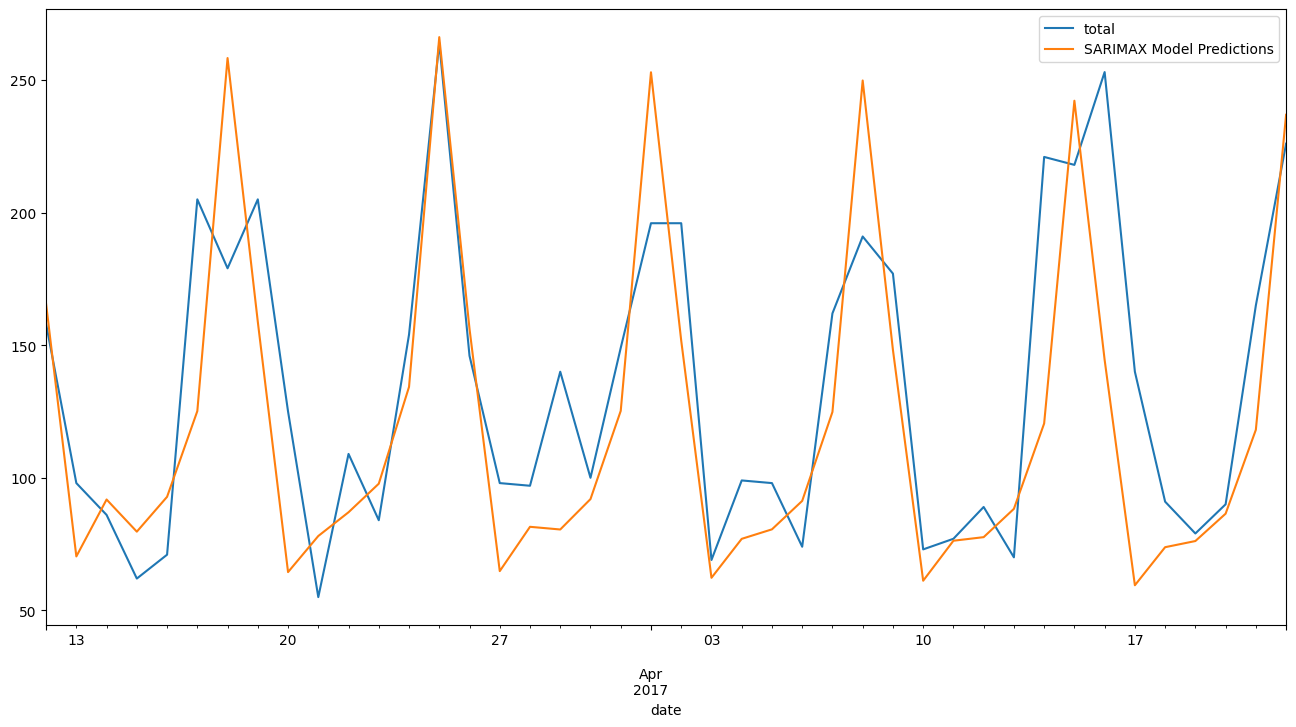

In [87]:
test['total'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)
plt.show()

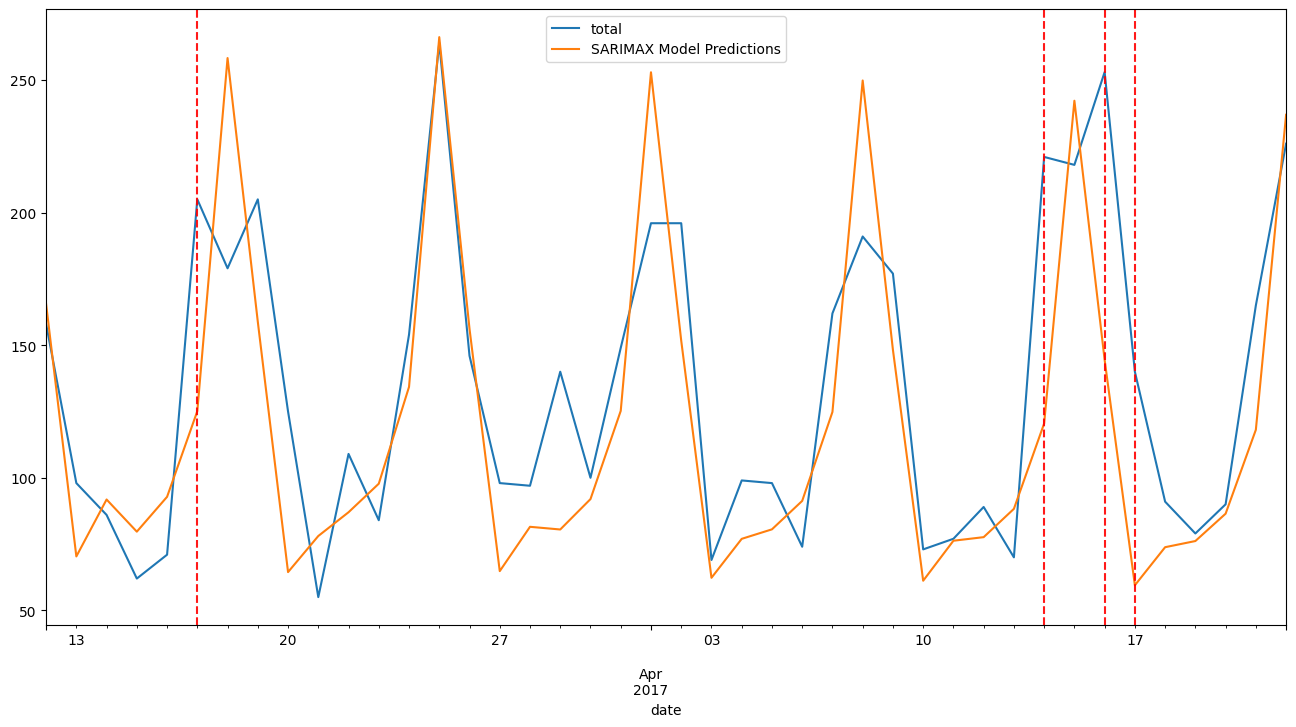

In [88]:
# add in markers to holidays on the prediction plot
ax = test['total'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True, ax=ax)

for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.9)
plt.show()

#### Evaluate the model using RMSE

In [89]:
from statsmodels.tools.eval_measures import rmse

In [90]:
rmse(test['total'], predictions)

np.float64(41.26315495807577)

In [91]:
# compare to the meand of test set
test['total'].mean()

np.float64(134.26190476190476)

# SARIMAX

Need to provide more information for future dates <br>
need to provide the known exogenous variables into the future <br>
Can NOT also predict these future exogenous variables <br>

#### Add in exogenous variable

In [92]:
# Note: statsmodels expects 2 sets of [[]] for exogenous variables
df1[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [93]:
# add in holiday exogenous variable
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.019
Date:                   Mon, 08 Dec 2025   AIC                           4774.038
Time:                           01:23:28   BIC                           4790.716
Sample:                       01-01-2016   HQIC                          4780.595
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8298      1.427      2.685      0.007       1.034       6.626
ar.S.L7        0.9681      0.011     84.337      0.000       0.946       0.991
ma.S.L7       -0.7840      0.045    -17.247      0.000      -0.873      -0.695
sigma2      1182.0419     68.220     17.327      0.000    1048.333    1315.751
===================================================================================
Ljung-Box (L1) (Q):                  16.27   Jarque-Bera (JB):                73.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.79
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train SARIMAX modle

In [94]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0,1, 7), enforce_invertibility=False)

In [95]:
result = model.fit()

In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2096.175
Date:                           Mon, 08 Dec 2025   AIC                           4204.350
Time:                                   01:23:30   BIC                           4228.816
Sample:                               01-01-2016   HQIC                          4214.006
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.5577      3.843     17.579      0.000      60.025      75.090
ar.L1          0.9999      0.000   5949.036      0.000       1.000       1.000
ma.L1         -1.0408      0.015    -70.127      0.000      -1.070      -1.012
ar.S.L7        0.9998      0.000   2699.855      0.000       0.999       1.001
ma.S.L7       -1.0289      0.029    -35.441      0.000      -1.086      -0.972
sigma2       682.9460     52.309     13.056      0.000     580.423     785.469
===================================================================================
Ljung-Box (L1) (Q):                  12.11   Jarque-Bera (JB):                16.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.21
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predicted values from test set

In [97]:
start = len(train)
end = len(train) + len(test) -1

In [98]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog') # note - the holidays have to be passed in from the test set


<Axes: xlabel='date'>

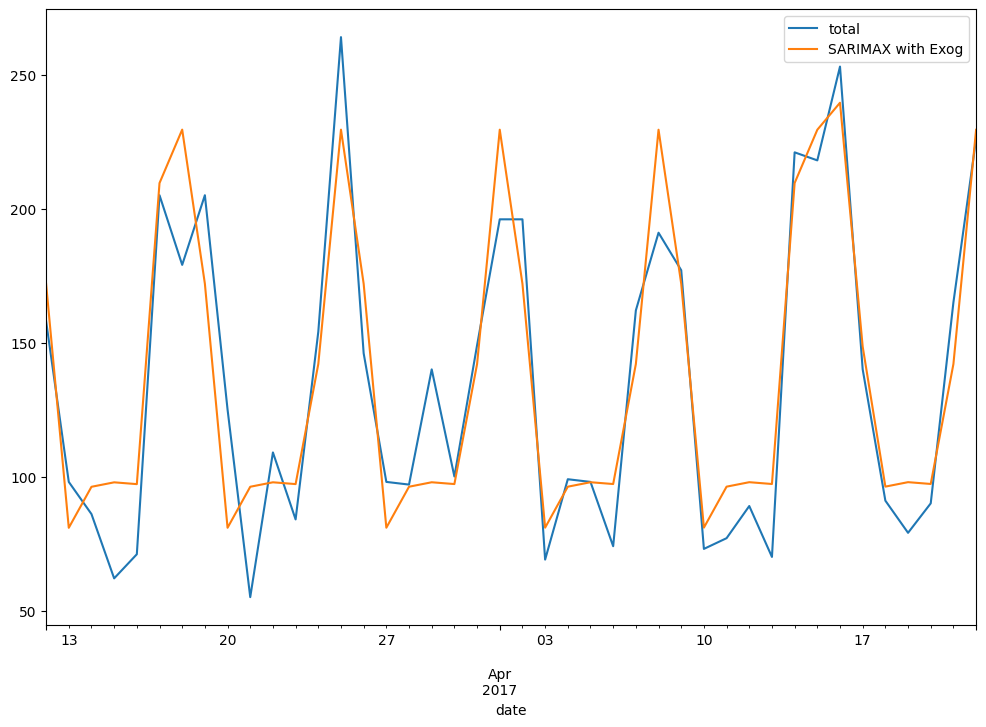

In [112]:
test['total'].plot(legend=True)
predictions.plot(legend=True, figsize=(12,8))


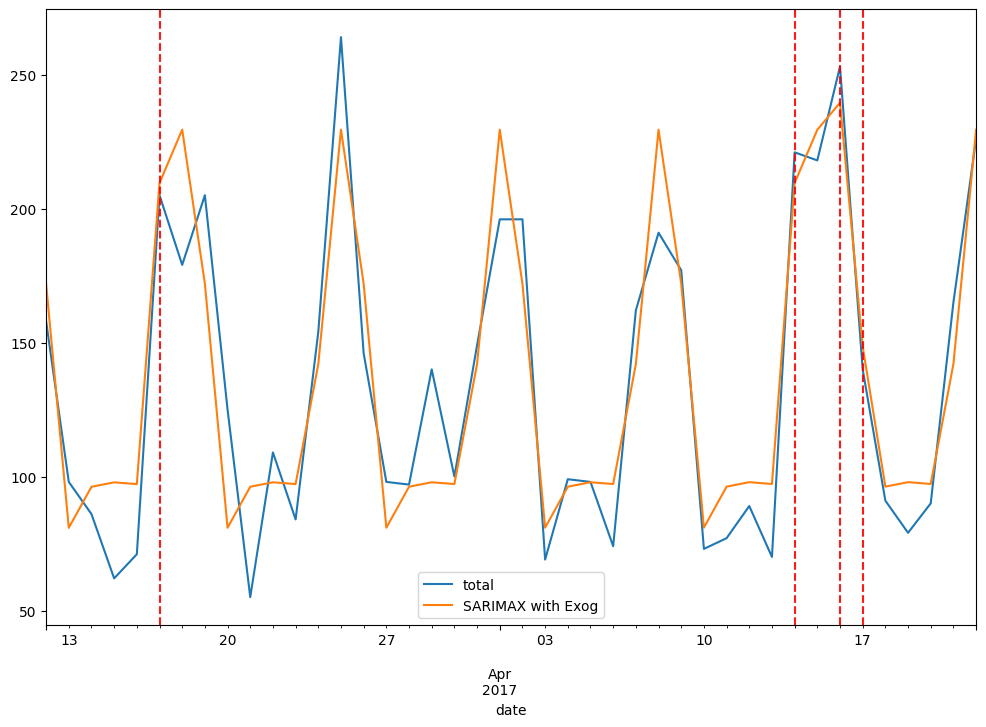

In [114]:
# add in markers to holidays on the prediction plot
ax = test['total'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True, ax=ax)


for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.9)
plt.show()

#### Evaluate SARIMAX using RMSE

In [101]:
rmse(test['total'], predictions)

np.float64(22.538347708347672)

SARIMA RMSE = 41.26315495807577 Vs SARIMAX RMSE = 22.538347708347672

# Forecast into the Unknown Future

For SARIMAX - Need to know the exogenous variable (holidays) into the future

In [102]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0,1, 7), enforce_invertibility=False)

In [103]:
results = model.fit()

In [104]:
# location of exogenous variables into the future
df[478:]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [105]:
exog_forecast = df[478:][['holiday']]

In [106]:
exog_forecast

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0
2017-04-28,0
2017-04-29,0
2017-04-30,0
2017-05-01,0


In [107]:
fcast = results.predict(len(df1), len(df1)+38, exog=exog_forecast).rename("Final SARIMAX Forecast")

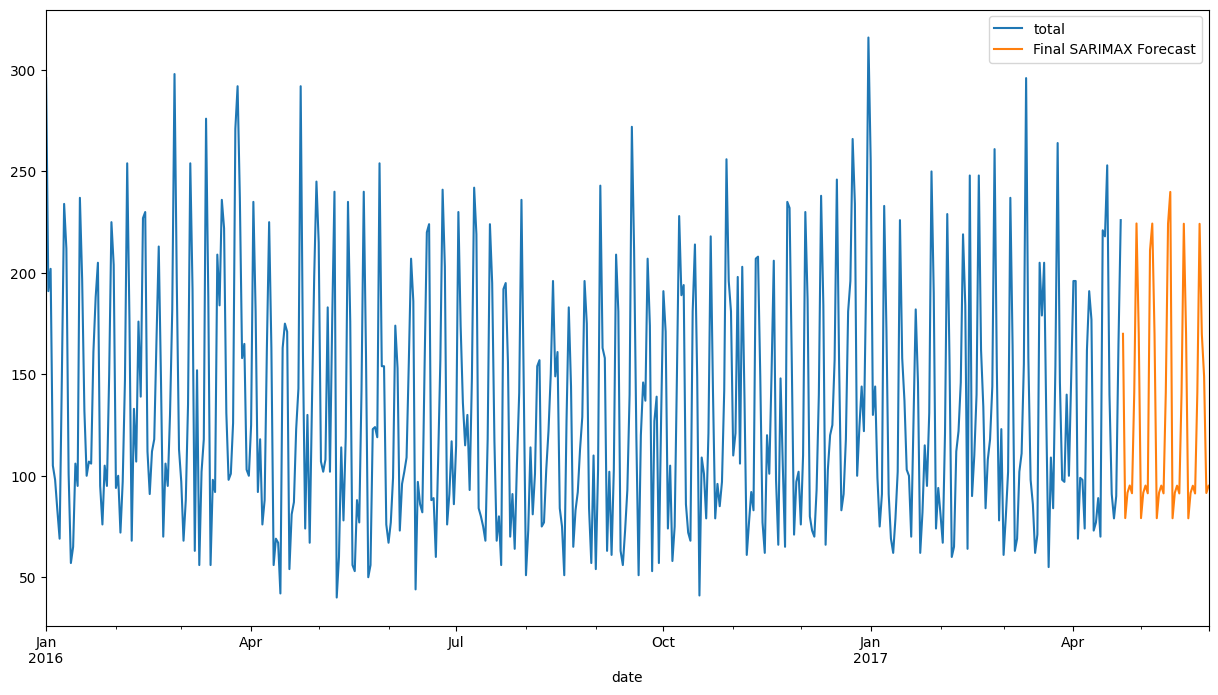

In [108]:
df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)
plt.show()

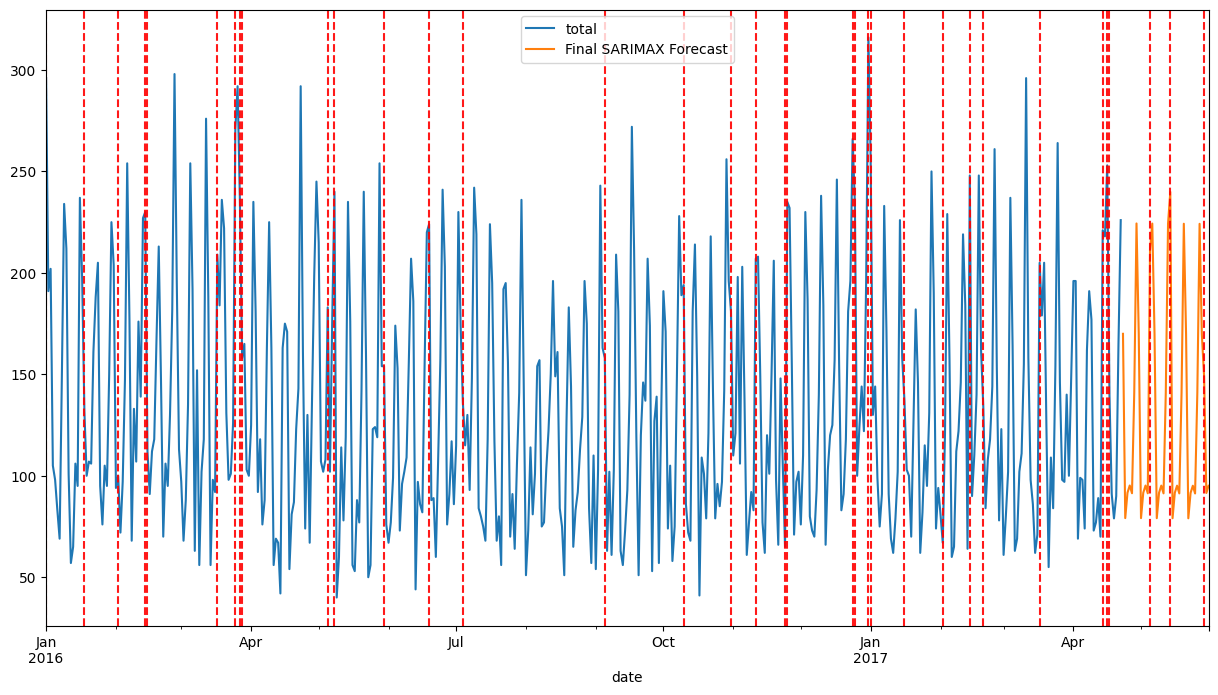

In [117]:
# add in markers to holidays on the prediction plot
ax = df1['total'].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.9)
plt.show()

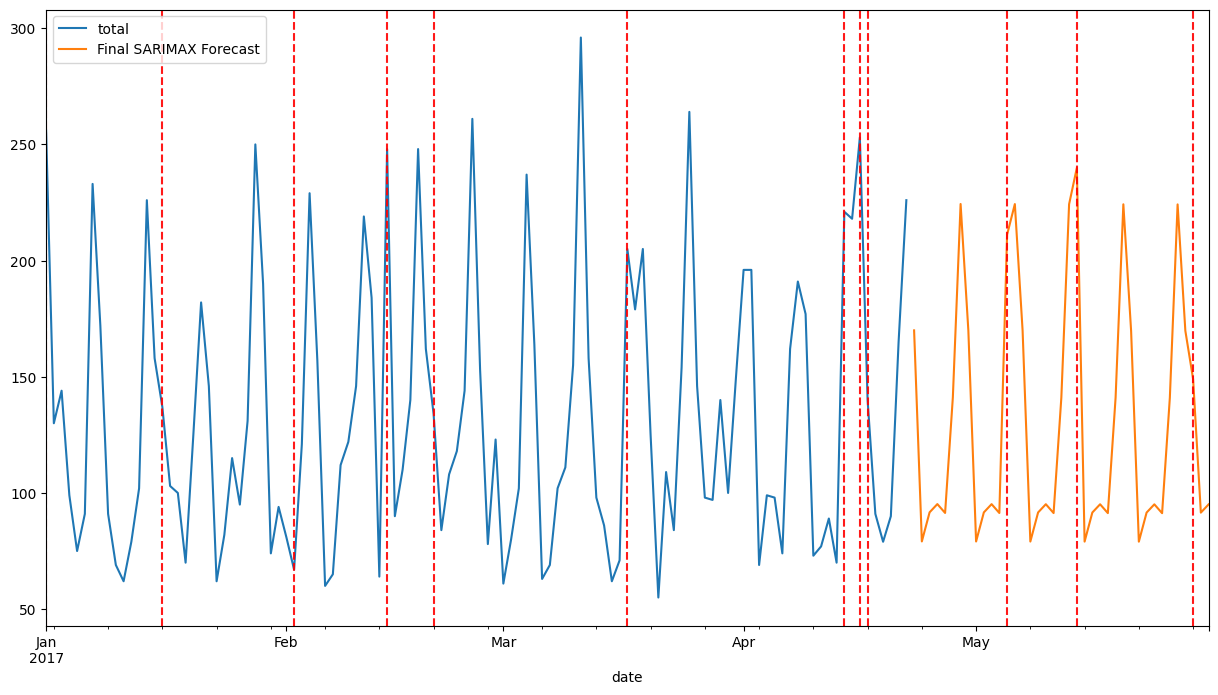

In [119]:
# plot from Jan 1 2017
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15,8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.9)
plt.show()